# Get confounders

In [7]:
import pandas as pd
kb = pd.read_csv('OmnipathSignedDirectedInteractions.csv')
direct_parents = kb.groupby('target_genesymbol').agg({
    'source_genesymbol':lambda x: 
        set(x.tolist())}).to_dict()
nodes = set(kb['target_genesymbol'].values)

In [26]:
kb

,source,target,source_genesymbol,target_genesymbol,is_directed,is_stimulation,is_inhibition,consensus_direction,consensus_stimulation,consensus_inhibition,dip_url,sources,references,curation_effort,n_references,n_resources,type
0,P0DP24,P48995,CALM2,TRPC1,1,0,1,1,0,1,NaN,TRIP,TRIP:11290752;TRIP:11983166;TRIP:12601176,3,3,1,ppi
1,Q03135,P48995,CAV1,TRPC1,1,1,0,1,1,0,http://dip.doe-mbi.ucla.edu/dip/DIPview.cgi?IK...,DIP;HPRD;IntAct;Lit-BM-17;TRIP,DIP:19897728;HPRD:12732636;IntAct:19897728;Lit...,13,8,5,ppi
2,P14416,P48995,DRD2,TRPC1,1,1,0,1,1,0,NaN,TRIP,TRIP:18261457,1,1,1,ppi
3,Q02790,P48995,FKBP4,TRPC1,1,0,1,1,0,1,NaN,TRIP,TRIP:15199065;TRIP:19945390;TRIP:23228564,3,3,1,ppi
4,Q99750,P48995,MDFI,TRPC1,1,0,1,1,0,1,NaN,HPRD;TRIP,HPRD:14530267;TRIP:14530267;TRIP:23770672,3,2,2,ppi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69062,Q92688,Q02223,ANP32B,TNFRSF17,1,1,0,1,1,0,NaN,Kirouac2010,NaN,0,0,1,ppi
69063,Q99616,P46092,CCL13,CCR10,1,1,0,1,1,0,NaN,EMBRACE;Wang,NaN,0,0,2,ppi
69064,Q99616,P51679,CCL13,CCR4,1,1,0,1,1,0,NaN,EMBRACE;Wang,NaN,0,0,2,ppi
69065,P58166,Q04771,INHBE,ACVR1,1,1,0,1,1,0,NaN,EMBRACE;Wang;iTALK,NaN,0,0,3,ppi


In [24]:
direct_parents

{'source_genesymbol': {'A1BG': {'EPHA2', 'GRB2'},
  'A2M': {'FOXO1',
   'GAB1',
   'GAB2',
   'GRB2',
   'HGF',
   'IL6',
   'LPL',
   'PTPN11',
   'SOS1',
   'STAT3'},
  'AAAS': {'RCC1'},
  'AATF': {'MAPKAPK2', 'SUCLA2'},
  'AATK': {'ANGPT1',
   'ANGPT2',
   'ANGPT4',
   'AREG',
   'BDNF',
   'CSF1',
   'EFNA1',
   'EFNA2',
   'EFNA3',
   'EFNA4',
   'EFNA5',
   'EGF',
   'EREG',
   'FGF1',
   'FGF10',
   'FGF16',
   'FGF17',
   'FGF18',
   'FGF19',
   'FGF2',
   'FGF20',
   'FGF21',
   'FGF22',
   'FGF23',
   'FGF3',
   'FGF4',
   'FGF5',
   'FGF6',
   'FGF7',
   'FGF8',
   'FGF9',
   'FLT3LG',
   'HGF',
   'IGF1',
   'IGF2',
   'INS',
   'KITLG',
   'NGF',
   'NTF3',
   'NTF4',
   'PDGFA',
   'PDGFB',
   'PDGFC',
   'PDGFD',
   'PGF',
   'TGFA',
   'VEGFA',
   'VEGFB',
   'VEGFC',
   'VEGFD'},
  'ABCA1': {'ADIPOQ',
   'APOA1',
   'NR1H2',
   'NR1H3',
   'OSBPL8',
   'PCYT1A',
   'RXRA',
   'RXRB',
   'RXRG',
   'SAA1',
   'SPTLC1',
   'TNF'},
  'ABCA3': {'ESR1'},
  'ABCB1': {'AKR1B1

In [54]:
from itertools import combinations
def get_confounders( ancestors, nodes ):
    confounders = {}
    for node1, node2 in combinations(nodes, 2):
        if node1 != node2:
            common_ancestors = ancestors[node1] & ancestors[node2]
            if len(common_ancestors) > 0:
                confounders[frozenset([node1,node2])] = common_ancestors
    return confounders
        

In [8]:
confounders = get_confounders(direct_parents['source_genesymbol'], nodes)
confounders

{frozenset({'ADCY8', 'PPP3CC'}): {'CALM1',
  'CALM2',
  'CALM3',
  'CALML3',
  'CALML5',
  'CALML6'},
 frozenset({'ADCY8', 'GJA1'}): {'EDN1', 'PRKCE'},
 frozenset({'ADCY8', 'CAMK1'}): {'CALM2'},
 frozenset({'ADCY8', 'TRPV4'}): {'CALM2'},
 frozenset({'ADCY8', 'RDX'}): {'PRKCE'},
 frozenset({'ADCY8', 'EGFR'}): {'EDN1', 'EDNRA', 'PRKCE'},
 frozenset({'ADCY8', 'GNAO1'}): {'EDNRA'},
 frozenset({'ADCY8', 'GRM7'}): {'CALM1', 'CALM2'},
 frozenset({'ADCY8', 'MAPK14'}): {'EDN1',
  'GNAI1',
  'GNAI2',
  'GNAI3',
  'GNAO1',
  'GNAZ'},
 frozenset({'ADCY8', 'PLA2G1B'}): {'EDN1'},
 frozenset({'ADCY8', 'CYSLTR1'}): {'EDN1', 'EDNRA'},
 frozenset({'ADCY8', 'ITGB3'}): {'PRKCE'},
 frozenset({'ADCY8', 'CD247'}): {'GNAI1', 'GNAI2', 'GNAI3', 'GNAO1', 'GNAZ'},
 frozenset({'ADCY8', 'CDC42'}): {'EDN1',
  'EDNRA',
  'GNAI1',
  'GNAI2',
  'GNAI3',
  'GNAO1',
  'GNAZ'},
 frozenset({'ADCY8', 'RHOA'}): {'EDN1',
  'EDNRA',
  'GNAI1',
  'GNAI2',
  'GNAI3',
  'GNAO1',
  'GNAZ',
  'PRKCE'},
 frozenset({'ADCY8', 'COL3A1'

In [29]:
len(confounders)

662998

# Edit the dot file


    

In [9]:
def add_confounders_to_dotfile( infile, outfile, confounders, style="dashed" ):
    nodes = set()
    found_confounders = {}
    with open(infile) as inf:
        with open(outfile, 'w') as outf:
            for line in inf:
                if '}' in line:
                    for node1, node2 in combinations(nodes, 2):
                        biedge = frozenset([node1,node2])
                        if biedge in confounders:
                            outf.write(f'{node1}->{node2} [style={style}, dir=both, color=blue]\n')
                            found_confounders[biedge] = confounders[biedge]
                elif '[' in line and '->' not in line:
                    nodes.add([n.strip() for n in line.split('[')][0])
                outf.write(line)
    return found_confounders, nodes
                    
            

 ## Show the confounding edges

In [10]:
from pathlib import Path
import os
dotdir = 'Results/Dotfiles'
infile = os.path.join( dotdir, 'VN1203vsMock_for_24hr_kegg_influenza_ns1.dot' )
outfile = os.path.join(dotdir,  'VN1203vsMock_for_24hr_kegg_influenza_ns1.confounders.dot')
confounders_24, nodes_24 = add_confounders_to_dotfile(infile, outfile, confounders)

How many confounders and nodes?

In [11]:
len(confounders_24), len(nodes_24)

(948, 77)

How many potential pairwise confounders?

In [47]:
77*76/2

2926.0

## Hide the confounding edges

But let their existence guide the graph layout

In [34]:
outfile = os.path.join(dotdir,  'VN1203vsMock_for_24hr_kegg_influenza_ns1.noconfounders.dot')
confounders_24, nodes_24 = add_confounders_to_dotfile(infile, outfile, confounders, style='invis')

In [62]:
len(confounders_24), len(nodes_24)


(948, 77)

In [37]:
import pydot
graph = pydot.graph_from_dot_file(outfile)[0]
node = graph.get_nodes()[0]
node.get_name()

'NS1'

In [39]:
edges = graph.get_edges()
str(edges[0])

'MAPK1 -> CDK1  [arrowhead="tee", color=black, penwidth=1];'

In [40]:
vertices = [node.get_name() for node in graph.get_nodes()]
di_edges = [(edge.get_source(), edge.get_destination()) 
               for edge in graph.get_edges()
                if 'dir' not in edge.get_attributes()
               ]
bi_edges = [(edge.get_source(), edge.get_destination())
               for edge in graph.get_edges()
               if 'dir' in edge.get_attributes()]

In [41]:
di_edges

[('MAPK1', 'CDK1'),
 ('MAPK1', 'FOXO3'),
 ('CDK1', 'CSNK2A1'),
 ('SOCS3', 'IFNGR1'),
 ('CREB1', 'FOXO3'),
 ('HSF1', 'SUMO1'),
 ('YAP1', 'TEAD2'),
 ('SUMO1', 'YAP1'),
 ('ERBB4', 'ZNF652'),
 ('BRAF', 'PRKAB1'),
 ('IFNGR1', 'CAMK2G'),
 ('PRKAB1', 'FOXO3'),
 ('PRKAB1', 'ATF3'),
 ('RPS6KA2', 'GSK3B'),
 ('CAMK2G', 'CREB3'),
 ('TP63', 'POU2F2'),
 ('FOSL1', 'MGP'),
 ('SSRP1', 'TP63'),
 ('PTP4A1', 'ATF7'),
 ('KEAP1', 'GABPA'),
 ('MAPK1', 'PAK1'),
 ('MAPK1', 'STAT1'),
 ('MAPK1', 'CREBBP'),
 ('MAPK1', 'HIF1A'),
 ('MAPK1', 'EGR1'),
 ('MAPK1', 'SP1'),
 ('MAPK1', 'FOS'),
 ('MAPK1', 'CREB1'),
 ('MAPK1', 'PPARA'),
 ('MAPK1', 'ESR1'),
 ('MAPK1', 'SP3'),
 ('MAPK1', 'LRP6'),
 ('MAPK1', 'NR4A1'),
 ('MAPK1', 'HNF1A'),
 ('MAPK1', 'RPS6KA2'),
 ('MAPK1', 'RUNX2'),
 ('MAPK1', 'SREBF2'),
 ('MAPK1', 'HNF4A'),
 ('MAPK1', 'SREBF1'),
 ('MMP14', 'CD44'),
 ('PRKDC', 'USF1'),
 ('PAK1', 'CAMKK1'),
 ('PAK1', 'BCL3'),
 ('PAK1', 'ESR1'),
 ('PAK1', 'BRAF'),
 ('PAK1', 'RPS6KA2'),
 ('PAK1', 'ELF3'),
 ('STAT1', 'VEGFD'),
 ('C

In [15]:
edge = graph.get_edges()[0]
dir(edge)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get_attribute__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'create_attribute_methods',
 'get',
 'get_URL',
 'get_arrowhead',
 'get_arrowsize',
 'get_arrowtail',
 'get_attributes',
 'get_color',
 'get_colorscheme',
 'get_comment',
 'get_constraint',
 'get_decorate',
 'get_destination',
 'get_dir',
 'get_edgeURL',
 'get_edgehref',
 'get_edgetarget',
 'get_edgetooltip',
 'get_fontcolor',
 'get_fontname',
 'get_fontsize',
 'get_headURL',
 'get_headclip',
 'get_headhref',
 'get_headlabel',
 'get_headport',
 'get_headtarget',
 'get_headtooltip',
 'get_href',
 'get_id',
 'get_label',
 'get_labelURL',
 'get_labelangle',
 'get_labeld

In [20]:
edge.get_attributes()

{'penwidth': '1', 'color': 'black', 'arrowhead': '"tee"'}

In [42]:
import pydot
from ananke.graphs import ADMG
def dotfile2admg( infile ):
    graph = pydot.graph_from_dot_file(infile)[0]
    vertices = [node.get_name() for node in graph.get_nodes()]
    di_edges = [(edge.get_source(), edge.get_destination()) 
               for edge in graph.get_edges()
                if 'dir' not in edge.get_attributes()
               ]
    bi_edges = [(edge.get_source(), edge.get_destination())
               for edge in graph.get_edges()
               if 'dir' in edge.get_attributes()]
    return ADMG(vertices, di_edges, bi_edges)
   

In [45]:
nodes_24

{'AHR',
 'ATF3',
 'ATF7',
 'BCL3',
 'BMP1',
 'BRAF',
 'CAMK2G',
 'CAMKK1',
 'CD44',
 'CDK1',
 'CREB1',
 'CREB3',
 'CREBBP',
 'CSNK2A1',
 'EGR1',
 'ELF3',
 'ERBB4',
 'ESR1',
 'FOS',
 'FOSL1',
 'FOXO3',
 'GABPA',
 'GSK3B',
 'HIF1A',
 'HMBOX1',
 'HNF1A',
 'HNF1B',
 'HNF4A',
 'HSF1',
 'IFNGR1',
 'IRF4',
 'JAK1',
 'KEAP1',
 'KLF5',
 'KMT2A',
 'LRP6',
 'MAPK1',
 'MGP',
 'MMP14',
 'NANOG',
 'NFYB',
 'NR4A1',
 'NS1',
 'PAK1',
 'PAX7',
 'PCBD1',
 'PKM',
 'POU2F2',
 'POU5F1',
 'PPARA',
 'PRKAB1',
 'PRKDC',
 'PTP4A1',
 'RB1',
 'RBPJ',
 'RPS6KA2',
 'RUNX2',
 'SOCS3',
 'SOX2',
 'SP1',
 'SP3',
 'SREBF1',
 'SREBF2',
 'SSRP1',
 'STAT1',
 'SUMO1',
 'TCF12',
 'TCF4',
 'TEAD2',
 'TFAP2A',
 'TP63',
 'USF1',
 'VAV1',
 'VEGFD',
 'YAP1',
 'YY1',
 'ZNF652'}

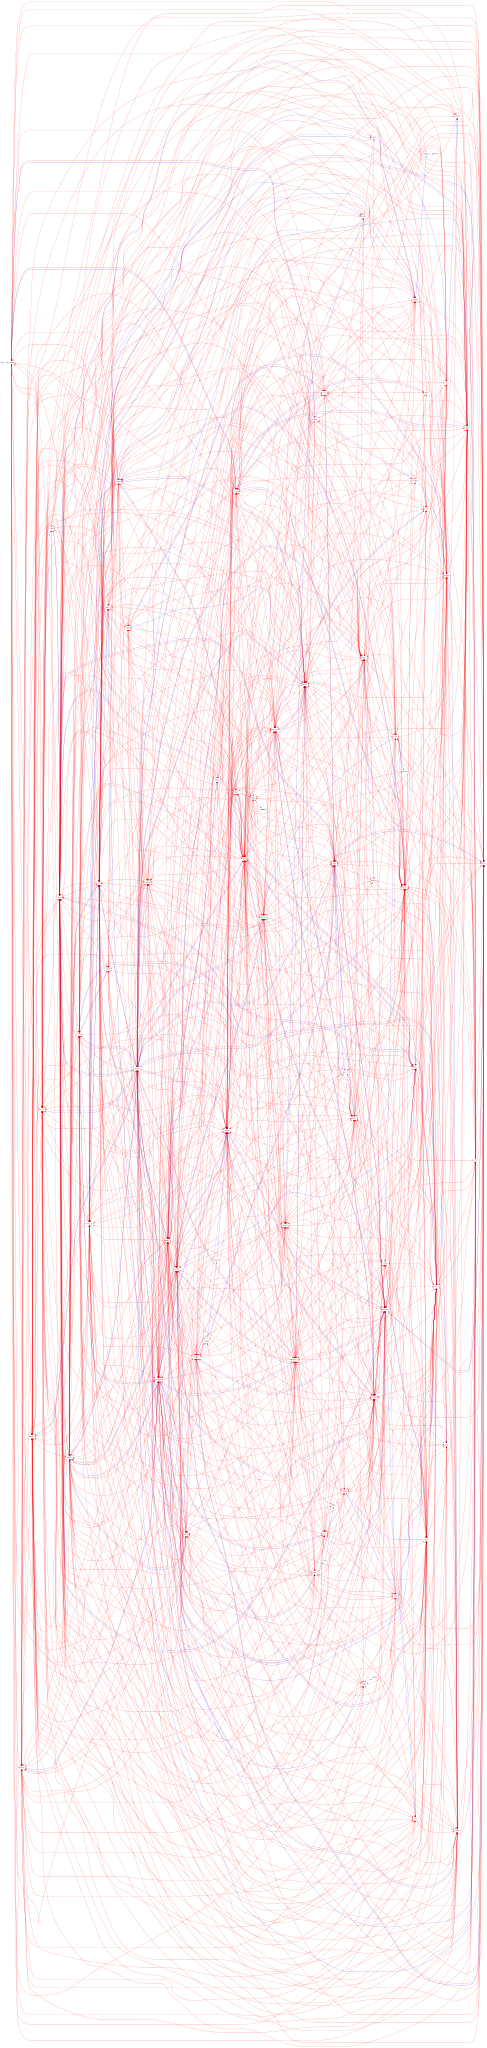

In [43]:
admg = dotfile2admg(outfile)
admg.draw(direction="LR")

In [49]:
from ananke.identification import OneLineID

onelineid = OneLineID(graph=admg, treatments=['NS1'], outcomes=list(nodes_24))
onelineid.id()

True

In [ ]:
onelineid = OneLineID(graph=admg, treatments=[nod], outcomes=list(nodes_24))
onelineid.id()

In [59]:
sorted_nodes = admg.topological_sort()
identifiable = []
unidentifiable = []
for node1, node2 in combinations(sorted_nodes, 2):
    onelineid = OneLineID(graph=admg, treatments=[node1], outcomes=[node2])
    if onelineid.id():
        identifiable.append([node1,node2])
    else:
        unidentifiable.append([node1,node2])
        print(node1,node2)

SOCS3 IFNGR1
SOCS3 CAMK2G
SOCS3 CREB3
SOCS3 JAK1
SOCS3 IRF4
SOCS3 VAV1
SOCS3 MAPK1
SOCS3 HNF4A
SOCS3 PAK1
SOCS3 ELF3
SOCS3 RPS6KA2
SOCS3 SOX2
SOCS3 CAMKK1
SOCS3 PCBD1
SOCS3 HNF1B
SOCS3 BCL3
SOCS3 GSK3B
SOCS3 HSF1
SOCS3 PRKDC
SOCS3 USF1
SOCS3 SUMO1
SOCS3 YAP1
SOCS3 TEAD2
SOCS3 RUNX2
SOCS3 CREB1
SOCS3 FOS
SOCS3 FOSL1
SOCS3 MGP
SOCS3 BMP1
SOCS3 HMBOX1
SOCS3 BRAF
SOCS3 PRKAB1
SOCS3 ATF3
SOCS3 FOXO3
SOCS3 CDK1
SOCS3 CSNK2A1
SOCS3 KEAP1
SOCS3 GABPA
SOCS3 SSRP1
SOCS3 TP63
SOCS3 POU2F2
SOCS3 PPARA
SOCS3 AHR
SOCS3 EGR1
SOCS3 PTP4A1
SOCS3 ATF7
SOCS3 LRP6
SOCS3 CREBBP
SOCS3 RBPJ
SOCS3 PAX7
SOCS3 KMT2A
SOCS3 YY1
SOCS3 HNF1A
SOCS3 RB1
SOCS3 SP3
SOCS3 SP1
SOCS3 MMP14
SOCS3 CD44
SOCS3 NANOG
SOCS3 NFYB
SOCS3 TFAP2A
SOCS3 NR4A1
SOCS3 HIF1A
SOCS3 PKM
SOCS3 POU5F1
SOCS3 KLF5
SOCS3 SREBF1
SOCS3 TCF4
SOCS3 STAT1
SOCS3 VEGFD
SOCS3 ERBB4
SOCS3 ESR1
SOCS3 ZNF652
SOCS3 TCF12
SOCS3 SREBF2
IFNGR1 CAMK2G
IFNGR1 CREB3
IFNGR1 CREBBP
IFNGR1 RBPJ
IFNGR1 PAX7
IFNGR1 KMT2A
IFNGR1 YY1
IFNGR1 HNF1A
IFNGR1 RB1
IFNGR1 SP3


CSNK2A1 SREBF1
KEAP1 GABPA
PPARA ESR1
AHR ESR1
EGR1 PTP4A1
EGR1 ATF7
LRP6 CREBBP
LRP6 RBPJ
LRP6 PAX7
LRP6 KMT2A
LRP6 YY1
LRP6 HNF1A
LRP6 RB1
LRP6 SP3
LRP6 SP1
LRP6 MMP14
LRP6 CD44
LRP6 NANOG
LRP6 NFYB
LRP6 TFAP2A
LRP6 NR4A1
LRP6 HIF1A
LRP6 PKM
LRP6 POU5F1
LRP6 KLF5
LRP6 SREBF1
LRP6 TCF4
LRP6 VEGFD
LRP6 ERBB4
LRP6 ESR1
LRP6 ZNF652
LRP6 TCF12
CREBBP RBPJ
CREBBP PAX7
CREBBP KMT2A
CREBBP YY1
CREBBP HNF1A
CREBBP RB1
CREBBP SP3
CREBBP SP1
CREBBP MMP14
CREBBP CD44
CREBBP NANOG
CREBBP NFYB
CREBBP TFAP2A
CREBBP NR4A1
CREBBP HIF1A
CREBBP PKM
CREBBP POU5F1
CREBBP KLF5
CREBBP SREBF1
CREBBP VEGFD
CREBBP ERBB4
CREBBP ESR1
CREBBP ZNF652
CREBBP TCF12
HNF1A ESR1
RB1 SP3
RB1 SP1
RB1 MMP14
RB1 CD44
RB1 NANOG
RB1 NFYB
RB1 HIF1A
RB1 PKM
RB1 POU5F1
RB1 SREBF1
RB1 VEGFD
RB1 ERBB4
RB1 ESR1
RB1 ZNF652
RB1 TCF12
SP3 SP1
SP3 MMP14
SP3 CD44
SP3 NANOG
SP3 SREBF1
SP1 MMP14
SP1 CD44
SP1 NANOG
SP1 SREBF1
MMP14 CD44
MMP14 NANOG
NR4A1 HIF1A
NR4A1 PKM
NR4A1 POU5F1
NR4A1 VEGFD
NR4A1 ERBB4
NR4A1 ESR1
NR4A1 ZNF652
NR4A1 TC

In [60]:
print(f"Identified queries: {len(identifiable)}\nUnidentified queries: {len(unidentifiable)}")

Identified queries: 2100
Unidentified queries: 826


## Represent confounders as bidirected edges in Graphviz

# Import the Libsbml library

In [2]:
import libsbml

## Read in the model

In [23]:
r = libsbml.SBMLReader()
d = r.readSBML('R-HSA-168255.sbml')
m = d.getModel()
m

<Model pathway_168255 "Influenza Infection">

In [24]:
m.getNumReactions()

59

In [25]:
m.getNumSpecies()

142

In [11]:
print(m.notes.toXMLString())

<notes>
  <p xmlns="http://www.w3.org/1999/xhtml">For centuries influenza epidemics have plagued man; with influenza probably being the disease described by Hippocrates in 412 BC. Today it remains a major cause of morbidity and mortality worldwide with large segments of the human population affected every year. Many animal species can be infected by influenza viruses, often with catastrophic consequences. An influenza pandemic is a continuing global level threat. The 1918 influenza pandemic is a modern example of how devastating such an event could be with an estimated 50 million deaths worldwide. Influenza viruses belong to the family of Orthomyxoviridae; viruses with segmented RNA genomes that are negative sense and single-stranded (Baltimore 1971). Influenza virus strains are named according to their type (A, B, or C), the species from which the virus was isolated (omitted if human), location of isolate, the number of the isolate, the year of isolation, and in the case of influenza 

In [14]:

print('\n'.join(['\t'.join([rxn.getId(), rxn.getName()]) 
                 for rxn in m.getListOfReaction()]))

reaction_192677	Newly synthesized vRNP for export
reaction_192746	Binding of M1 to vRNP
reaction_168893	Binding of NEP/NS2 to vRNP:M1
reaction_168880	vRNP Export through the nuclear pore
reaction_168857	Binding of vRNP:M1:NEP complex to CRM1 export receptor
reaction_168285	Clathrin-Mediated Pit Formation And Endocytosis Of The Influenza Virion
reaction_168272	Binding of the influenza virion to the host cell
reaction_192704	Synthesis of PB1-F2
reaction_192841	Viral Protein Synthesis
reaction_192627	Viral mRNA Export
reaction_168326	Assembly of an Active Transcription Complex
reaction_168280	Priming and Initiation of Transcription
reaction_168301	Elongation, Polyadenylation and Termination
reaction_192781	Viral mRNA Splicing (M, NS segments)
reaction_192925	Export of Spliced Viral mRNA
reaction_192832	Initiation of cRNA Synthesis
reaction_192624	cRNA Extension
reaction_192912	NP binds vRNA
reaction_192830	Viral Polymerase Assembly
reaction_192851	vRNA Extension
reaction_192916	Initiation

In [26]:
rxn = m.getReaction('reaction_169919')
reactants = rxn.getListOfReactants()
reactants[0].getSpecies()

'species_203497'

In [28]:
m.getSpecies(reactants[0].getSpecies())

<Species species_203497 "NA [endoplasmic reticulum membrane]">

In [29]:
for rxn in m.getListOfReactions():
    print("{}\t{}".format(rxn.getId(), rxn.getName()))
    print("   Reactants:")
    for reactant in rxn.getListOfReactants():
        specie = m.getSpecies(reactant.getSpecies())
        print("\t{}\t{}".format(specie.getId(), specie.getName()))
    print("   Products:")
    for product in rxn.getListOfProducts():
        specie = m.getSpecies(product.getSpecies())
        print("\t{}\t{}".format(specie.getId(), specie.getName()))
    print("   Regulator:")
    for catalyst in rxn.getListOfModifiers():
        specie = m.getSpecies(catalyst.getSpecies())
        print("\t{}\t{}".format(specie.getId(), specie.getName()))

reaction_192677	Newly synthesized vRNP for export
   Reactants:
	species_188877	PA [nucleoplasm]
	species_188857	PB2 [nucleoplasm]
	species_188843	PB1 [nucleoplasm]
	species_193302	vRNA (Genomic):NP Complex [nucleoplasm]
   Products:
	species_192922	vRNP destined for Export [nucleoplasm]
   Regulator:
	species_188832	NP [nucleoplasm]
reaction_192746	Binding of M1 to vRNP
   Reactants:
	species_186959	M1 [nucleoplasm]
	species_192922	vRNP destined for Export [nucleoplasm]
   Products:
	species_192906	vRNP:M1 for Export [nucleoplasm]
   Regulator:
	species_6792605	HSPA1A [nucleoplasm]
reaction_168893	Binding of NEP/NS2 to vRNP:M1
   Reactants:
	species_192906	vRNP:M1 for Export [nucleoplasm]
	species_169474	NEP/NS2 [nucleoplasm]
   Products:
	species_192767	vRNP:M1:NEP [nucleoplasm]
   Regulator:
reaction_168880	vRNP Export through the nuclear pore
   Reactants:
	species_192667	vRNP Export Complex [nucleoplasm]
	species_180738	RAN:GTP [nucleoplasm]
   Products:
	species_29372	Pi [cytosol

In [22]:
from collections import defaultdict
from functools import partial
from torch import tensor

import statistics
import pyro
from pyro import condition, do, sample
from pyro.optim import SGD
import torch.distributions.constraints as constraints

from pyro.distributions import Normal, Delta
from pyro.infer import EmpiricalMarginal, Importance, SVI, Trace_ELBO
